In [ ]:
from google.colab import drive
import pandas as pd
import os

drive.mount('/content/drive/')
root_path = "/content/drive/My Drive/Dataset/"
files = os.listdir(root_path)
for file in files:
    print(file)

file_path = "PhiUSIIL_Phishing_URL_Dataset.csv"
df = pd.read_csv(root_path+file_path)



Mounted at /content/drive/
PhiUSIIL_Phishing_URL_Dataset.csv
detect_bad_url_models
fixed_overfitting_models


In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
print(df.memory_usage(deep=True).sum() / (1024**2), "MB")
print(df.info())

175.1640748977661 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64 

In [ ]:
null_values = df.isnull().sum()
print(null_values[null_values > 0])


Series([], dtype: int64)


# X√°c ƒë·ªãnh ki·ªÉu d·ªØ li·ªáu

In [ ]:
#Categorical Features

# ƒê·ªãnh danh / T√™n (Identifiers)
categorical_identifiers = [
    "FILENAME", "URL", "Domain", "TLD", "Title"
]

# Ph√¢n lo·∫°i d·∫°ng nh·ªã ph√¢n (Binary Categorical Features - 0 ho·∫∑c 1)
categorical_binary = [
    "IsDomainIP", "HasObfuscation", "IsHTTPS", "HasTitle", "HasFavicon",
    "Robots", "IsResponsive", "HasDescription", "HasExternalFormSubmit",
    "HasSocialNet", "HasSubmitButton", "HasHiddenFields", "HasPasswordField",
    "Bank", "Pay", "Crypto", "HasCopyrightInfo"
]

# Ph√¢n lo·∫°i d·∫°ng nhi·ªÅu gi√° tr·ªã (Ordinal Categorical Features)
categorical_ordinal = [
    "NoOfSubDomain", "NoOfURLRedirect", "NoOfSelfRedirect",
    "NoOfPopup", "NoOfiFrame"
]

#Numerical Features

# Bi·∫øn s·ªë nguy√™n (Discrete Numerical Features)
numerical_discrete = [
    "URLLength", "DomainLength", "TLDLength",
    "NoOfDegitsInURL", "NoOfEqualsInURL", "NoOfQMarkInURL",
    "NoOfAmpersandInURL", "NoOfOtherSpecialCharsInURL",
    "LineOfCode", "LargestLineLength", "NoOfImage", "NoOfCSS",
    "NoOfJS", "NoOfSelfRef", "NoOfEmptyRef", "NoOfExternalRef"
]

# Bi·∫øn s·ªë th·ª±c (Continuous Numerical Features)
numerical_continuous = [
    "URLSimilarityIndex", "DomainTitleMatchScore", "URLTitleMatchScore",
    "URLCharProb", "CharContinuationRate", "DomainLength", "URLLength",
    "LetterRatioInURL", "DegitRatioInURL", "SpacialCharRatioInURL",
    "NoOfOtherSpecialCharsInURL", "NoOfLettersInURL"
]

# Ki·ªÉm tra ƒë·ªô d√†i t·ª´ng nh√≥m ƒë·∫∑c tr∆∞ng
print("Length of Categorical Identifiers:", len(categorical_identifiers))
print("Length of Categorical Binary:", len(categorical_binary))
print("Length of Categorical Ordinal:", len(categorical_ordinal))
print("Length of Numerical Discrete:", len(numerical_discrete))
print("Length of Numerical Continuous:", len(numerical_continuous))



Length of Categorical Identifiers: 5
Length of Categorical Binary: 17
Length of Categorical Ordinal: 5
Length of Numerical Discrete: 16
Length of Numerical Continuous: 12


## Ti√™u ch√≠ ch·ªçn ƒë·∫∑c tr∆∞ng (L·ªçc ƒëƒÉc tr∆∞ng categorical)
- Gi·ªØ l·∫°i nh·ªØng ƒë·∫∑c tr∆∞ng c√≥ P-Value < 0.05 ‚Üí Ch√∫ng c√≥ √Ω nghƒ©a th·ªëng k√™.
- Lo·∫°i b·ªè nh·ªØng ƒë·∫∑c tr∆∞ng c√≥ P-Value > 0.05 ‚Üí Kh√¥ng c√≥ √Ω nghƒ©a th·ªëng k√™, c√≥ th·ªÉ b·ªè ƒëi.
- ∆Øu ti√™n nh·ªØng ƒë·∫∑c tr∆∞ng c√≥ Chi2 Score cao ‚Üí ƒê·∫∑c tr∆∞ng quan tr·ªçng h∆°n.

In [ ]:


X_categorical = df[categorical_binary + categorical_ordinal]
y = df["label"]

# Ki·ªÉm tra gi√° tr·ªã NaN v√† x·ª≠ l√Ω n·∫øu c√≥
X_categorical = X_categorical.fillna(0)

# Chu·∫©n h√≥a d·ªØ li·ªáu tr∆∞·ªõc khi t√≠nh Chi-Square (Chi2 y√™u c·∫ßu d·ªØ li·ªáu kh√¥ng √¢m)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_categorical)

# Th·ª±c hi·ªán Chi-Square test
chi2_values, p_values = chi2(X_scaled, y)

chi2_df = pd.DataFrame({"Feature": X_categorical.columns, "Chi2 Score": chi2_values, "P-Value": p_values})
chi2_df = chi2_df.sort_values(by="Chi2 Score", ascending=False)

from google.colab.data_table import DataTable
DataTable(chi2_df)

## Ph√¢n t√≠ch t∆∞∆°ng quan (L·ªçc ƒë·∫∑c tr∆∞ng numerical)
- ƒê·∫∑c tr∆∞ng c√≥ gi√° tr·ªã t∆∞∆°ng quan d∆∞∆°ng cao (gi√° tr·ªã > 0.2)
- ƒê·∫∑c tr∆∞ng c√≥ t∆∞∆°ng quan trung b√¨nh (0.1 < x < 0.2)
- ƒê·∫∑c tr∆∞ng c√≥ t∆∞∆°ng quan √¢m m·∫°nh (gi√° tr·ªã < -0.2)
- ƒê·∫∑c tr∆∞ng c√≥ t∆∞∆°ng quan g·∫ßn 0 (kh√¥ng ·∫£nh h∆∞·ªüng nhi·ªÅu ƒë·∫øn label)

<ipython-input-6-10a8be866967>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_correlation.values, y=label_correlation.index, palette="coolwarm")


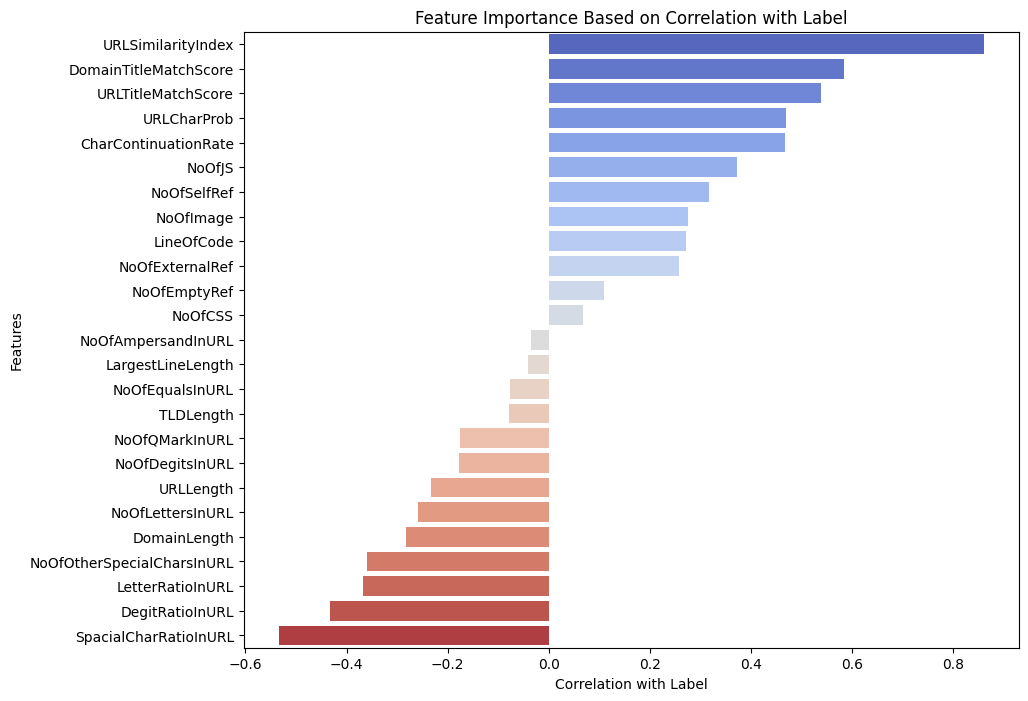

In [ ]:
# T√≠nh to√°n h·ªá s·ªë t∆∞∆°ng quan gi·ªØa c√°c ƒë·∫∑c tr∆∞ng s·ªë v√† label
correlation = df[numerical_discrete + numerical_continuous + ["label"]].corr()

# L·∫•y gi√° tr·ªã t∆∞∆°ng quan c·ªßa label v·ªõi c√°c ƒë·∫∑c tr∆∞ng
label_correlation = correlation["label"].drop("label").sort_values(ascending=False)

# barplot
plt.figure(figsize=(10, 8))
sns.barplot(x=label_correlation.values, y=label_correlation.index, palette="coolwarm")
plt.xlabel("Correlation with Label")
plt.ylabel("Features")
plt.title("Feature Importance Based on Correlation with Label")
plt.show()

# Virtualize Data

In [ ]:
selected_cate_features = [
    "HasSocialNet", "HasCopyrightInfo", "HasDescription",
    "HasSubmitButton", "HasHiddenFields", "HasFavicon",
    "Robots", "IsResponsive", "Pay", "IsHTTPS",
    "Bank", "HasTitle", "HasExternalFormSubmit",
    "HasPasswordField", "Crypto",
]

selected_numerical_features = [
    "URLSimilarityIndex", "DomainTitleMatchScore", "URLTitleMatchScore",
    "URLCharProb", "CharContinuationRate",

]
selected_features = selected_cate_features + selected_numerical_features + ["label"]

df_selected = df[selected_features]

df_selected.head()
df_selected.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HasSocialNet           235795 non-null  int64  
 1   HasCopyrightInfo       235795 non-null  int64  
 2   HasDescription         235795 non-null  int64  
 3   HasSubmitButton        235795 non-null  int64  
 4   HasHiddenFields        235795 non-null  int64  
 5   HasFavicon             235795 non-null  int64  
 6   Robots                 235795 non-null  int64  
 7   IsResponsive           235795 non-null  int64  
 8   Pay                    235795 non-null  int64  
 9   IsHTTPS                235795 non-null  int64  
 10  Bank                   235795 non-null  int64  
 11  HasTitle               235795 non-null  int64  
 12  HasExternalFormSubmit  235795 non-null  int64  
 13  HasPasswordField       235795 non-null  int64  
 14  Crypto                 235795 non-nu

### Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi c·ªßa c√°c ƒë·∫∑c tr∆∞ng ph√¢n lo·∫°i (Categorical Features)

<ipython-input-10-f23d72f6c265>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, palette="viridis")
<ipython-input-10-f23d72f6c265>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, palette="viridis")
<ipython-input-10-f23d72f6c265>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, palette="viridis")
<ipython-input-10-f23d72f6c265>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to

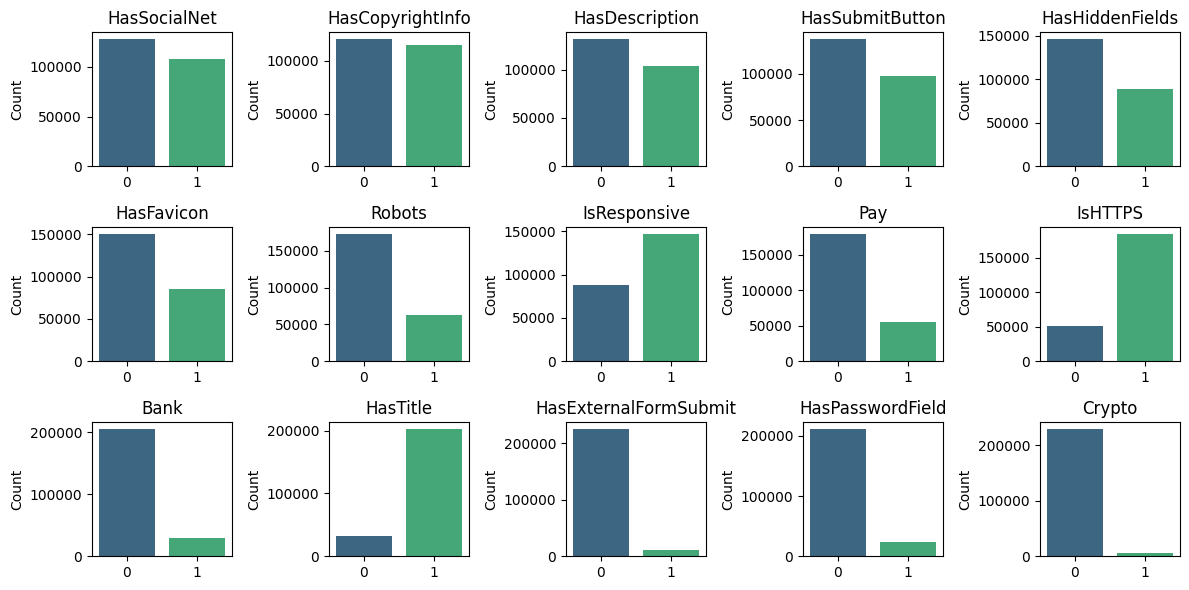

In [ ]:

plt.figure(figsize=(12, 6))

# Duy·ªát qua c√°c c·ªôt ph√¢n lo·∫°i v√† v·∫Ω bi·ªÉu ƒë·ªì c·ªôt
for i, col in enumerate(selected_cate_features):
    plt.subplot(3, 5, i+1)
    sns.countplot(data=df_selected, x=col, palette="viridis")
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


### Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi c·ªßa c√°c ƒë·∫∑c tr∆∞ng s·ªë (Numerical Features)
M·ªôt s·ªë ƒë·∫∑c tr∆∞ng b·ªã ph√¢n b·ªë l·ªách m·∫°nh:
- URLSimilarityIndex, DomainTitleMatchScore, URLTitleMatchScore , CharContinuationRate c√≥ 2 ƒë·ªânh r√µ r√†ng (·ªü 0 v√† 100). ƒêi·ªÅu n√†y cho th·∫•y d·ªØ li·ªáu c√≥ s·ª± m·∫•t c√¢n b·∫±ng v√† c√≥ th·ªÉ ·∫£nh h∆∞·ªüng ƒë·∫øn m√¥ h√¨nh.
- URLCharProb c√≥ ph√¢n ph·ªëi g·∫ßn chu·∫©n, nh∆∞ng c≈©ng c√≥ m·ªôt s·ªë gi√° tr·ªã ngo·∫°i l·ªá.

<Figure size 1600x1200 with 0 Axes>

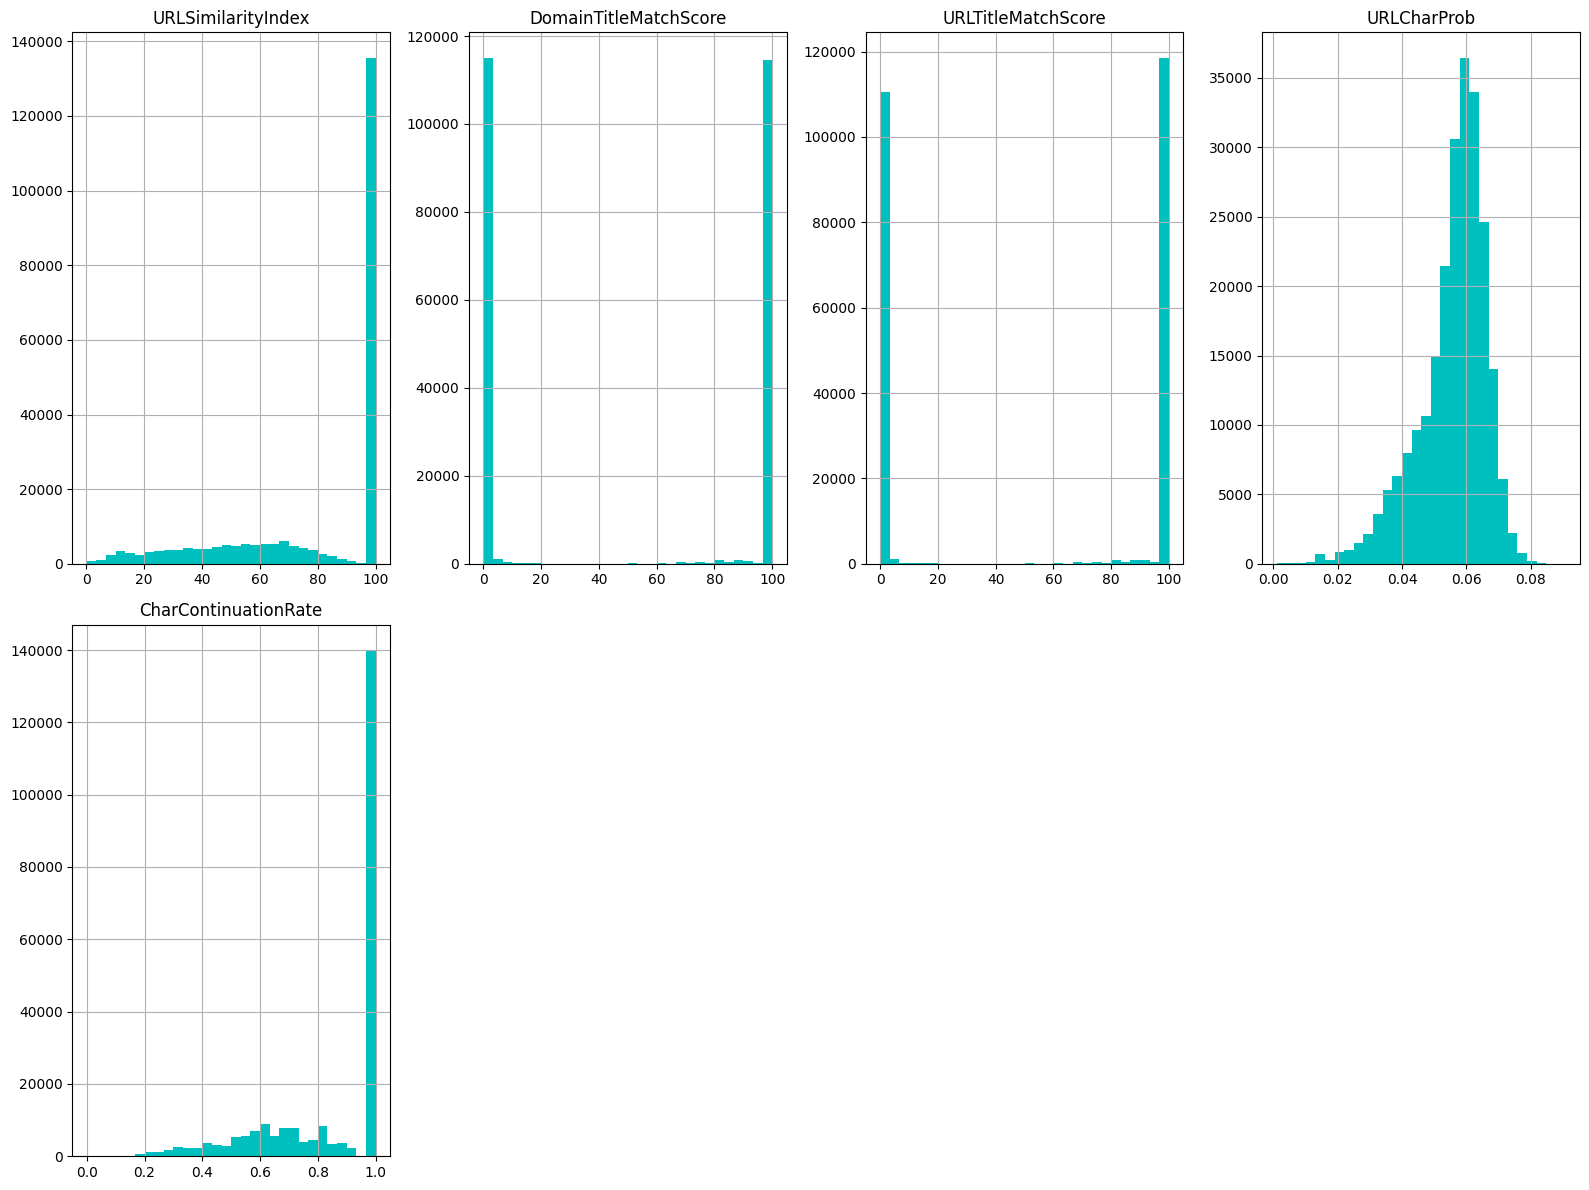

In [ ]:
# plt.figure(figsize=(12, 6))

# # V·∫Ω histogram cho c√°c c·ªôt s·ªë
# df_selected[selected_numerical_features].hist(bins=30, figsize=(12, 6), layout=(2, 3), color='c')
# plt.tight_layout()
# plt.show()

num_features = len(selected_numerical_features)

# X√°c ƒë·ªãnh s·ªë h√†ng v√† s·ªë c·ªôt cho subplot (t·∫°o m·ªôt l∆∞·ªõi 3x4)
rows = (num_features // 4) + (num_features % 4 > 0)  # Chia l√†m 4 c·ªôt
cols = 4

plt.figure(figsize=(16, 12))

df_selected[selected_numerical_features].hist(
    bins=30, figsize=(16, 12), layout=(rows, cols), color='c'
)

plt.tight_layout()
plt.show()


### Ki·ªÉm tra m·ªëi quan h·ªá gi·ªØa c√°c ƒë·∫∑c tr∆∞ng v√† nh√£n (label)
- Nhi·ªÅu ƒë·∫∑c tr∆∞ng c√≥ outliers (ngo·∫°i l·ªá):
URLCharProb v√† CharContinuationRate c√≥ nhi·ªÅu ƒëi·ªÉm n·∫±m ngo√†i r√¢u (whiskers), ƒëi·ªÅu n√†y c√≥ th·ªÉ g√¢y ·∫£nh h∆∞·ªüng x·∫•u ƒë·∫øn m√¥ h√¨nh.
- URLSimilarityIndex, DomainTitleMatchScore, URLTitleMatchScore c√≥ ph·∫°m vi tr·∫£i r·ªông v√† c√≥ th·ªÉ c√≥ gi√° tr·ªã ngo·∫°i l·ªá l·ªõn.

<ipython-input-12-09aa7254d87e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_selected, x=col, palette="coolwarm")
<ipython-input-12-09aa7254d87e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_selected, x=col, palette="coolwarm")
<ipython-input-12-09aa7254d87e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_selected, x=col, palette="coolwarm")
<ipython-input-12-09aa7254d87e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `h

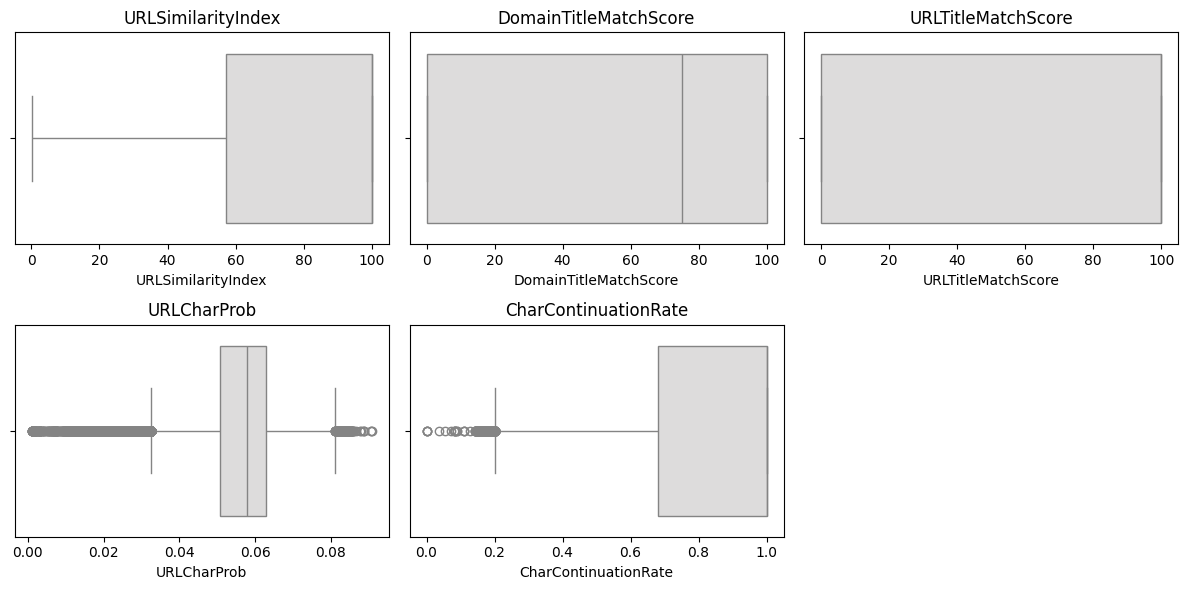

In [ ]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(selected_numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df_selected, x=col, palette="coolwarm")
    plt.title(col)

plt.tight_layout()
plt.show()


## X·ª≠ l√Ω d·ªØ li·ªáu l·ªách

In [ ]:
import numpy as np
# √Åp d·ª•ng log transformation cho c√°c ƒë·∫∑c tr∆∞ng s·ªë c√≥ gi√° tr·ªã d∆∞∆°ng
for col in ["URLSimilarityIndex", "DomainTitleMatchScore", "URLTitleMatchScore", "CharContinuationRate"]:
    df_selected[col] = np.log1p(df_selected[col])  # log(1 + x) ƒë·ªÉ tr√°nh log(0)


Q1 = df_selected[selected_numerical_features].quantile(0.25)
Q3 = df_selected[selected_numerical_features].quantile(0.75)
IQR = Q3 - Q1

# X√°c ƒë·ªãnh ng∆∞·ª°ng gi·ªõi h·∫°n
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# L·ªçc d·ªØ li·ªáu trong ng∆∞·ª°ng
df_selected = df_selected[~((df_selected[selected_numerical_features] < lower_bound) |
                            (df_selected[selected_numerical_features] > upper_bound)).any(axis=1)]


<ipython-input-13-3aa31515496b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = np.log1p(df_selected[col])  # log(1 + x) ƒë·ªÉ tr√°nh log(0)


#C√°c ƒë·∫∑c tr∆∞ng sau khi x·ª≠ l√Ω

<Figure size 1200x600 with 0 Axes>

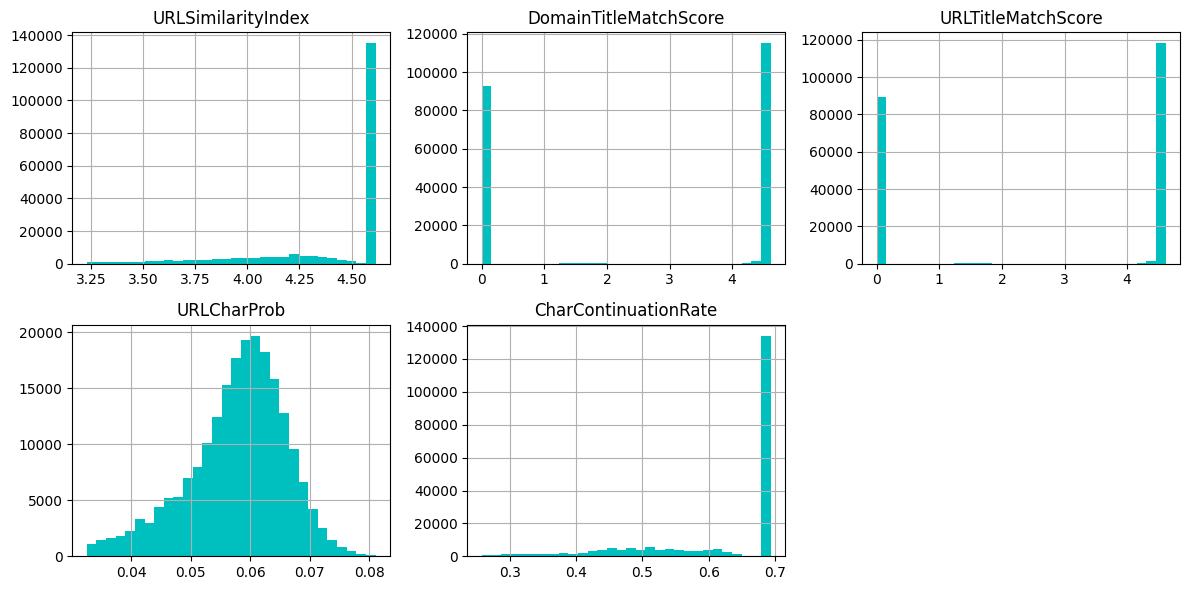

<ipython-input-14-c2c6316540fa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_selected, x=col, palette="coolwarm")
<ipython-input-14-c2c6316540fa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_selected, x=col, palette="coolwarm")
<ipython-input-14-c2c6316540fa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_selected, x=col, palette="coolwarm")
<ipython-input-14-c2c6316540fa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable t

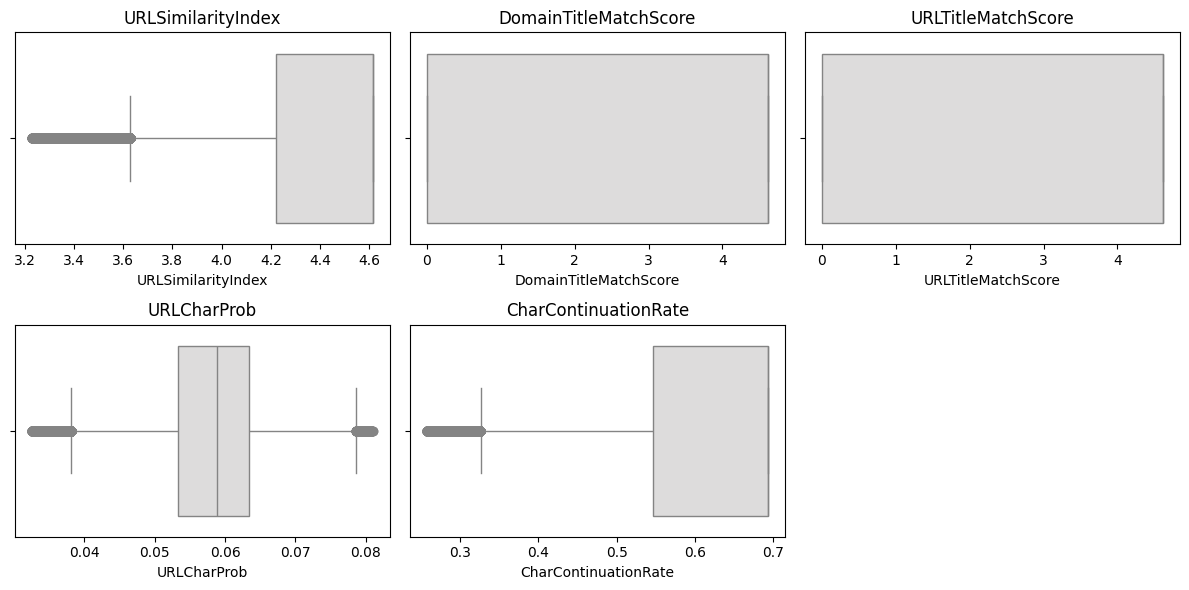

In [ ]:
plt.figure(figsize=(12, 6))

df_selected[selected_numerical_features].hist(bins=30, figsize=(12, 6), layout=(2, 3), color='c')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

for i, col in enumerate(selected_numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df_selected, x=col, palette="coolwarm")
    plt.title(col)

plt.tight_layout()
plt.show()



### Ki·ªÉm tra m·ªëi quan h·ªá gi·ªØa c√°c ƒë·∫∑c tr∆∞ng v√† nh√£n (label)
Nh·∫≠n x√©t chung v·ªÅ ma tr·∫≠n t∆∞∆°ng quan
- M√†u ƒë·ªè ƒë·∫≠m (~1.0 ho·∫∑c -1.0): M·ªëi quan h·ªá r·∫•t m·∫°nh gi·ªØa hai bi·∫øn.
- M√†u xanh (~0.0): Hai bi·∫øn g·∫ßn nh∆∞ kh√¥ng c√≥ m·ªëi quan h·ªá.
- M√†u trung gian (0.3 - 0.7): C√≥ m·ªëi quan h·ªá nh∆∞ng kh√¥ng qu√° m·∫°nh.

#### C√°c ƒë·∫∑c tr∆∞ng c√≥ m·ªëi quan h·ªá m·∫°nh v·ªõi label:

- HasSocialNet (0.76)
- HasCopyrightInfo (0.74)
- HasDescription (0.67)
- IsHTTPS (0.67)
- URLSimilarityIndex (0.83)


#### C√°c ƒë·∫∑c tr∆∞ng c√≥ t∆∞∆°ng quan cao v·ªõi nhau:

- HasSocialNet & HasCopyrightInfo (0.59)
- HasSocialNet & HasDescription (0.55)
- URLSimilarityIndex & DomainTitleMatchScore (0.97)
- URLSimilarityIndex & URLTitleMatchScore (0.79)

#### V·∫•n ƒë·ªÅ: N·∫øu hai ƒë·∫∑c tr∆∞ng c√≥ t∆∞∆°ng quan qu√° cao (>0.8), m·ªôt trong s·ªë ƒë√≥ c√≥ th·ªÉ b·ªã lo·∫°i b·ªè v√¨ ch·ª©a th√¥ng tin tr√πng l·∫∑p.

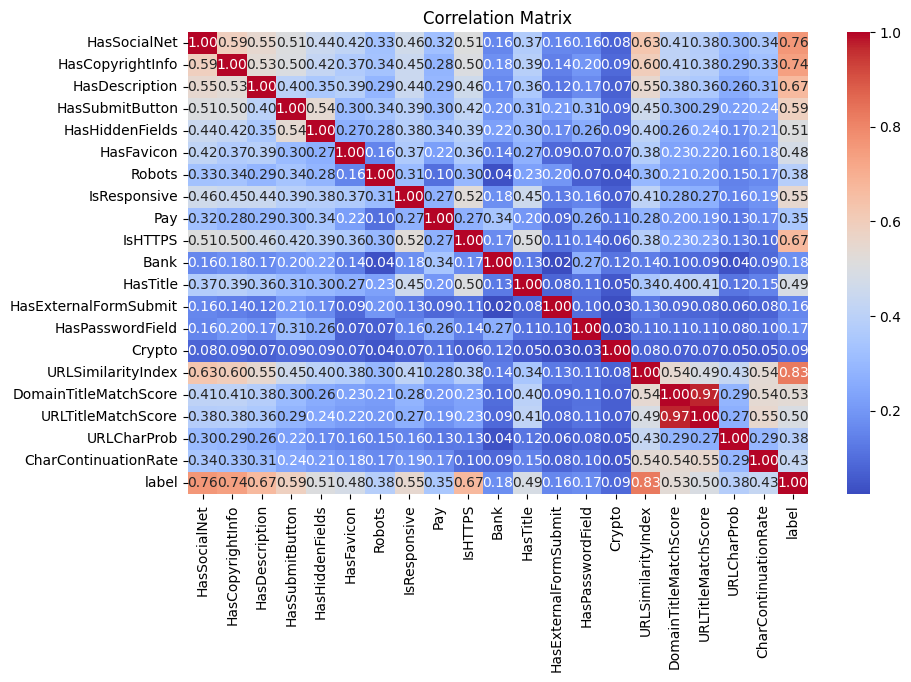

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Heatmap sau khi Lo·∫°i b·ªè ƒë·∫∑c tr∆∞ng d∆∞ th·ª´a (Multicollinearity)
- DomainTitleMatchScore v√† URLSimilarityIndex c√≥ t∆∞∆°ng quan 0.97 ‚Üí N√™n gi·ªØ l·∫°i - URLSimilarityIndex, lo·∫°i b·ªè DomainTitleMatchScore.
- URLTitleMatchScore v√† URLSimilarityIndex c√≥ t∆∞∆°ng quan 0.79 ‚Üí N·∫øu c·∫ßn, c√≥ th·ªÉ gi·ªØ c·∫£ hai, nh∆∞ng n√™n th·ª≠ nghi·ªám.

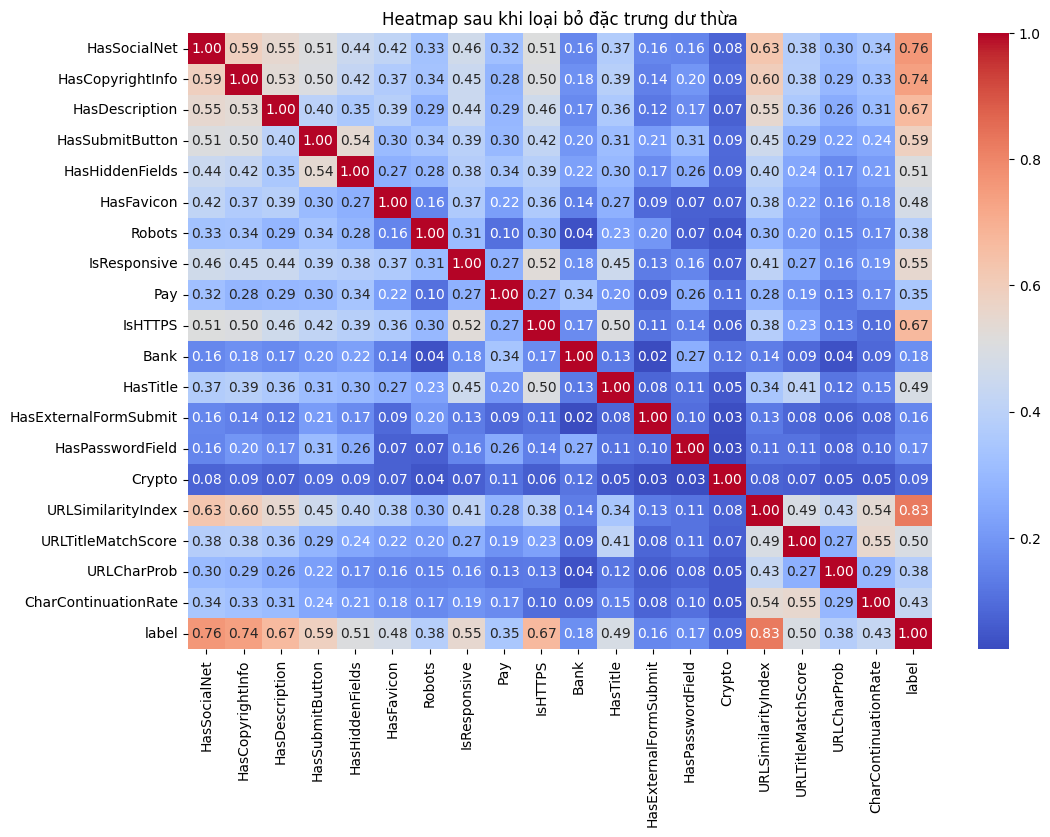

In [ ]:
df_selected = df_selected.drop(columns=["DomainTitleMatchScore"])
plt.figure(figsize=(12, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap sau khi lo·∫°i b·ªè ƒë·∫∑c tr∆∞ng d∆∞ th·ª´a")
plt.show()

## Model training
üîπ N·∫øu b·∫°n c·∫ßn ƒë·ªô ch√≠nh x√°c cao, kh√¥ng quan tr·ªçng t·ªëc ƒë·ªô hu·∫•n luy·ªán:
‚ûù Gradient Boosting (XGBoost, LightGBM, CatBoost)

üîπ N·∫øu b·∫°n c·∫ßn t·ªëc ƒë·ªô hu·∫•n luy·ªán nhanh nh∆∞ng v·∫´n hi·ªáu qu·∫£:
‚ûù Random Forest, Decision Tree

üîπ N·∫øu d·ªØ li·ªáu c√≥ m·ªëi quan h·ªá tuy·∫øn t√≠nh ƒë∆°n gi·∫£n:
‚ûù Logistic Regression, Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from google.colab.data_table import DataTable

X = df_selected.drop(columns=["label"])
y = df_selected["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = []
trained_models = {}

# Hu·∫•n luy·ªán v√† ƒë√°nh gi√° t·ª´ng m√¥ h√¨nh
for model_name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = model

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # X√°c su·∫•t d·ª± ƒëo√°n (n·∫øu c√≥)

    # T√≠nh c√°c ch·ªâ s·ªë ƒë√°nh gi√°
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    })

results_df = pd.DataFrame(results)

DataTable(results_df)


# L∆∞u tr·ªØ m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán

In [ ]:
model_dir = "/content/drive/My Drive/Dataset/detect_bad_url_models"
# Ki·ªÉm tra xem th∆∞ m·ª•c c√≥ t·ªìn t·∫°i kh√¥ng
if not os.path.exists(model_dir):
    print("Th∆∞ m·ª•c ch∆∞a t·ªìn t·∫°i, h√£y ki·ªÉm tra quy·ªÅn truy c·∫≠p tr√™n Google Drive.")
else:
    print("Th∆∞ m·ª•c ƒë√£ t·ªìn t·∫°i, ti·∫øp t·ª•c l∆∞u m√¥ h√¨nh.")

    # L∆∞u m√¥ h√¨nh v√†o th∆∞ m·ª•c tr√™n Google Drive
    saved_model_paths = {}
    for model_name, model in trained_models.items():
        file_path = os.path.join(model_dir, f"{model_name.replace(' ', '_')}.pkl")
        joblib.dump(model, file_path)
        saved_model_paths[model_name] = file_path

    print(saved_model_paths)

Th∆∞ m·ª•c ƒë√£ t·ªìn t·∫°i, ti·∫øp t·ª•c l∆∞u m√¥ h√¨nh.
{'Random Forest': '/content/drive/My Drive/Dataset/detect_bad_url_models/Random_Forest.pkl', 'Gradient Boosting': '/content/drive/My Drive/Dataset/detect_bad_url_models/Gradient_Boosting.pkl', 'Logistic Regression': '/content/drive/My Drive/Dataset/detect_bad_url_models/Logistic_Regression.pkl', 'Support Vector Machine': '/content/drive/My Drive/Dataset/detect_bad_url_models/Support_Vector_Machine.pkl', 'K-Nearest Neighbors': '/content/drive/My Drive/Dataset/detect_bad_url_models/K-Nearest_Neighbors.pkl', 'Decision Tree': '/content/drive/My Drive/Dataset/detect_bad_url_models/Decision_Tree.pkl'}


# T·∫£i model ƒë√£ l∆∞u

In [ ]:
model_dir = "/content/drive/My Drive/Dataset/detect_bad_url_models"

if os.path.exists(model_dir):
    print("ƒêang t·∫£i c√°c m√¥ h√¨nh ƒë√£ l∆∞u t·ª´ Google Drive...")

    loaded_models = {}
    for model_name in os.listdir(model_dir):
        if model_name.endswith(".pkl"):  # Ch·ªâ t·∫£i c√°c file m√¥ h√¨nh
            model_path = os.path.join(model_dir, model_name)
            loaded_model = joblib.load(model_path)  # T·∫£i m√¥ h√¨nh
            loaded_models[model_name.replace('.pkl', '').replace('_', ' ')] = loaded_model

    print("T·∫•t c·∫£ m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c t·∫£i th√†nh c√¥ng!")
    print(loaded_models)


ƒêang t·∫£i c√°c m√¥ h√¨nh ƒë√£ l∆∞u t·ª´ Google Drive...
T·∫•t c·∫£ m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c t·∫£i th√†nh c√¥ng!
{'Random Forest': RandomForestClassifier(random_state=42), 'Gradient Boosting': GradientBoostingClassifier(random_state=42), 'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42), 'Support Vector Machine': SVC(probability=True, random_state=42), 'K-Nearest Neighbors': KNeighborsClassifier(), 'Decision Tree': DecisionTreeClassifier(random_state=42)}


# Ki·ªÉm tra overfitting

In [ ]:
# L∆∞u k·∫øt qu·∫£ ki·ªÉm tra Overfitting
overfitting_results = []

# Duy·ªát qua c√°c m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
for model_name, model in loaded_models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred, zero_division=1)
    train_recall = recall_score(y_train, y_train_pred, zero_division=1)

    test_precision = precision_score(y_test, y_test_pred, zero_division=1)
    test_recall = recall_score(y_test, y_test_pred, zero_division=1)

    overfitting_results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Precision": train_precision,
        "Test Precision": test_precision,
        "Train Recall": train_recall,
        "Test Recall": test_recall,
        "Overfitting": (train_accuracy - test_accuracy) > 0.05  # N·∫øu Accuracy tr√™n train l·ªõn h∆°n test > 5%, c√≥ Overfitting
    })

overfitting_df = pd.DataFrame(overfitting_results)

DataTable(overfitting_df)


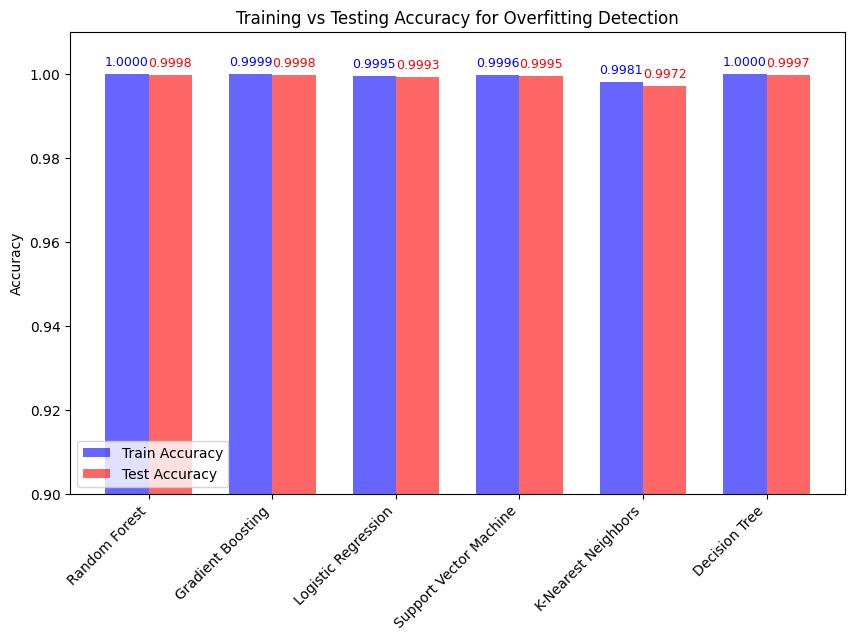

In [ ]:

plt.figure(figsize=(10, 6))
x_labels = overfitting_df["Model"]
x = np.arange(len(x_labels))  # V·ªã tr√≠ c·ªßa t·ª´ng m√¥ h√¨nh tr√™n tr·ª•c x
width = 0.35  # ƒê·ªô r·ªông c·ªßa t·ª´ng c·ªôt

# V·∫Ω c·ªôt Train Accuracy
plt.bar(x - width/2, overfitting_df["Train Accuracy"], width, color="blue", alpha=0.6, label="Train Accuracy")

# V·∫Ω c·ªôt Test Accuracy
plt.bar(x + width/2, overfitting_df["Test Accuracy"], width, color="red", alpha=0.6, label="Test Accuracy")

# Th√™m gi√° tr·ªã tr√™n m·ªói c·ªôt
for i in range(len(x_labels)):
    plt.text(x[i] - width/2, overfitting_df["Train Accuracy"][i] + 0.002, f"{overfitting_df['Train Accuracy'][i]:.4f}", ha="center", fontsize=9, color="blue")
    plt.text(x[i] + width/2, overfitting_df["Test Accuracy"][i] + 0.002, f"{overfitting_df['Test Accuracy'][i]:.4f}", ha="center", fontsize=9, color="red")

# Th√™m nh√£n tr·ª•c x v√† ƒë·ªãnh d·∫°ng
plt.xticks(x, x_labels, rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy for Overfitting Detection")
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.ylim(0.9, 1.01)  # Gi·ªõi h·∫°n tr·ª•c y ƒë·ªÉ th·∫•y r√µ s·ª± kh√°c bi·ªát

plt.show()

### Ki·ªÉm tra Feature Importance

In [ ]:
importances_results = []

# Ki·ªÉm tra Feature Importance cho c√°c m√¥ h√¨nh c√≥ h·ªó tr·ª£
for model_name, model in loaded_models.items():
    if hasattr(model, "feature_importances_"):  # Ch·ªâ √°p d·ª•ng cho c√°c m√¥ h√¨nh c√≥ feature_importances_
        feature_importances = model.feature_importances_
        sorted_indices = np.argsort(feature_importances)[::-1]  # S·∫Øp x·∫øp gi·∫£m d·∫ßn

        for i in sorted_indices:
            importances_results.append({
                "Model": model_name,
                "Feature": X.columns[i],
                "Importance": feature_importances[i]
            })

# Chuy·ªÉn k·∫øt qu·∫£ th√†nh DataFrame
importances_df = pd.DataFrame(importances_results)

# Hi·ªÉn th·ªã b·∫£ng Feature Importance
from google.colab.data_table import DataTable
DataTable(importances_df)


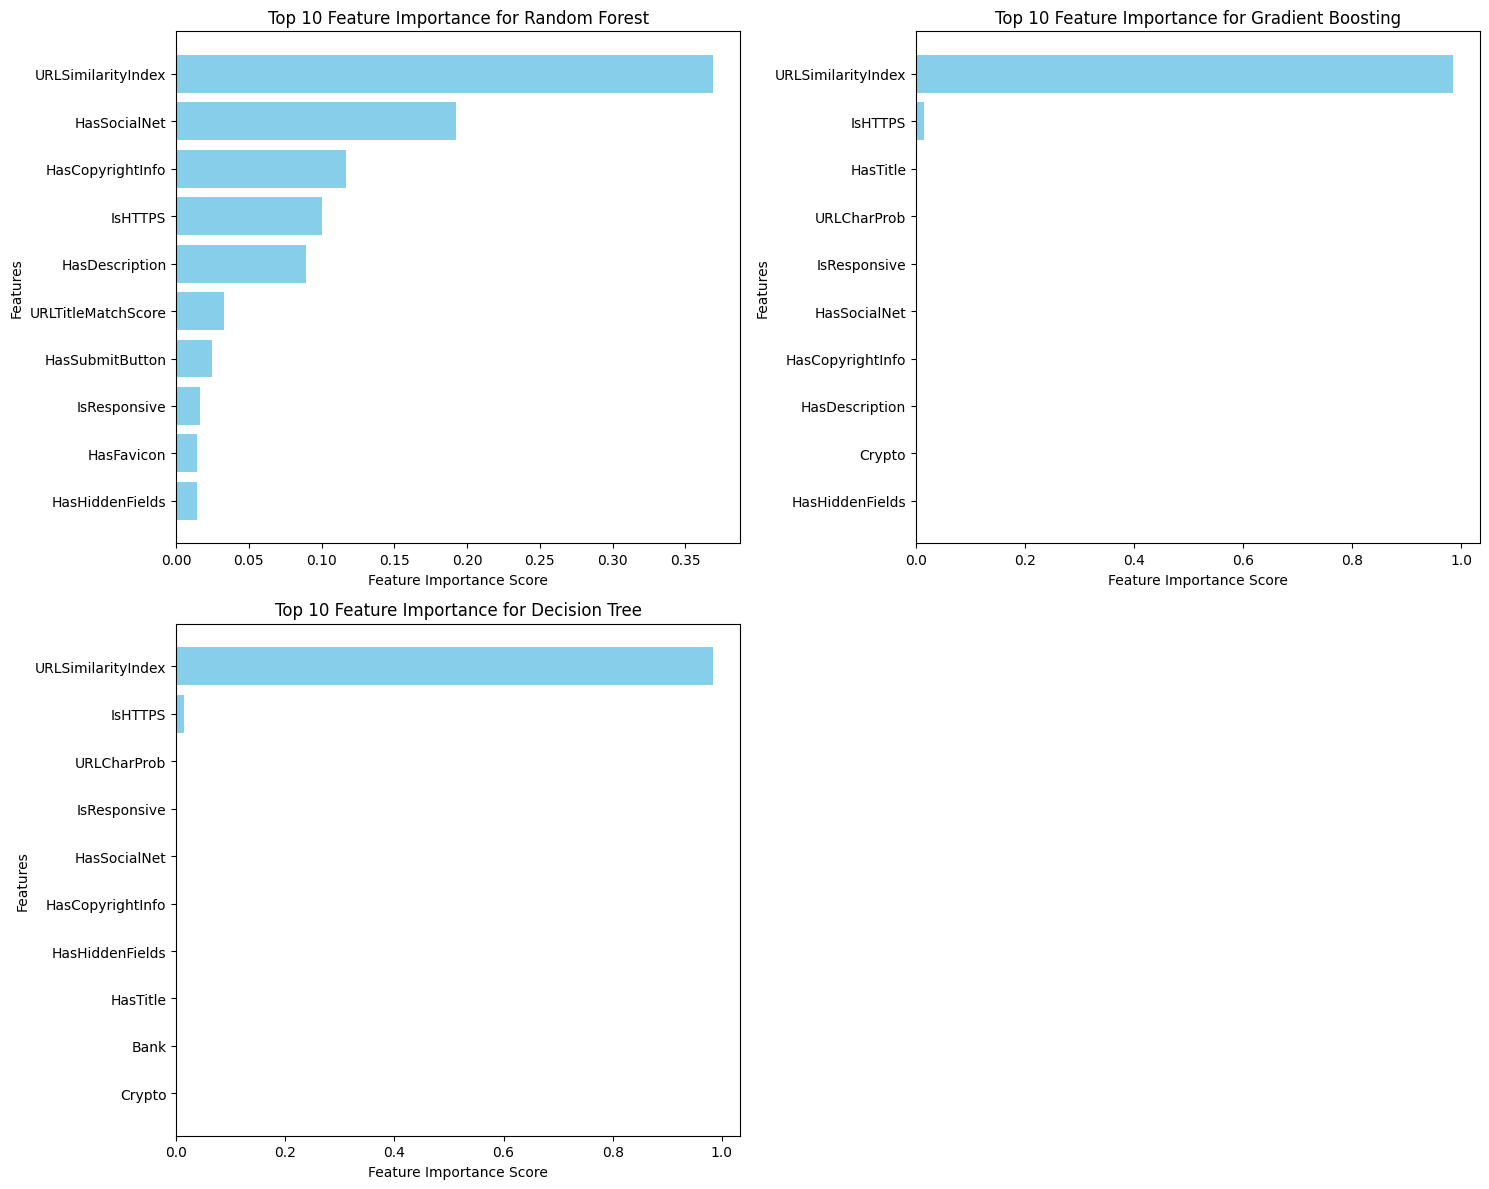

In [ ]:
# V·∫Ω bi·ªÉu ƒë·ªì Feature Importance cho t·∫•t c·∫£ c√°c m√¥ h√¨nh c√≥ h·ªó tr·ª£
plt.figure(figsize=(15, 12))

# Ch·ªçn c√°c m√¥ h√¨nh c√≥ feature importance
top_models = ["Random Forest", "Gradient Boosting", "Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree"]
valid_models = [model for model in top_models if model in importances_df["Model"].unique()]

num_models = len(valid_models)  # S·ªë m√¥ h√¨nh c√≥ Feature Importance h·ª£p l·ªá

for i, model_name in enumerate(valid_models):
    top_importances = importances_df[importances_df["Model"] == model_name].nlargest(10, "Importance")

    plt.subplot((num_models + 1) // 2, 2, i+1)  # Chia layout th√†nh nhi·ªÅu h√†ng n·∫øu c·∫ßn
    plt.barh(top_importances["Feature"], top_importances["Importance"], color="skyblue")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title(f"Top 10 Feature Importance for {model_name}")
    plt.gca().invert_yaxis()  # ƒê·∫£o ng∆∞·ª£c tr·ª•c y ƒë·ªÉ quan s√°t d·ªÖ h∆°n

plt.tight_layout()
plt.show()


## Overfitting : Ph√¢n t√≠ch v·ªÅ M·∫•t C√¢n B·∫±ng D·ªØ Li·ªáu

# Kh·∫Øc ph·ª•c overfitting
- Regularization
- Gi√°m nhi·ªÖu ƒë·∫ßu v√†o
- cross-validtion
- chu·∫©n h√≥a d·ªØ li·ªáu

In [ ]:
df_selected["label"].value_counts(normalize=True)

label
1    0.633436
0    0.366564
Name: proportion, dtype: float64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from google.colab.data_table import DataTable

# Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
X = df_selected.drop(columns=["label"])  # Lo·∫°i b·ªè c·ªôt label
y = df_selected["label"]  # Nh√£n ƒë·∫ßu ra

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lo·∫°i b·ªè URLSimilarityIndex (v√¨ n√≥ g√¢y Overfitting)
X_filtered = X.drop(columns=["URLSimilarityIndex"])

# Chia l·∫°i d·ªØ li·ªáu sau khi lo·∫°i b·ªè ƒë·∫∑c tr∆∞ng g√¢y Overfitting
X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

#  √Åp d·ª•ng Regularization & Hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh
models = {
    "Random Forest": RandomForestClassifier(max_depth=10, random_state=42),  # Gi·ªõi h·∫°n ƒë·ªô s√¢u
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.01, subsample=0.8, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, penalty='l2', C=0.1, random_state=42),  # L2 Regularization
    "Support Vector Machine": SVC(probability=True, kernel='linear', C=0.1, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
}

trained_models = {}

# L∆∞u k·∫øt qu·∫£ ƒë√°nh gi√° m√¥ h√¨nh
results_filtered = []

# Hu·∫•n luy·ªán v√† ƒë√°nh gi√° t·ª´ng m√¥ h√¨nh
for model_name, model in models.items():
    model.fit(X_train_filtered, y_train)  # Hu·∫•n luy·ªán m√¥ h√¨nh
    trained_models[model_name] = model  # L∆∞u l·∫°i m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán

    y_pred = model.predict(X_test_filtered)  # D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra
    y_pred_proba = model.predict_proba(X_test_filtered)[:, 1] if hasattr(model, "predict_proba") else None

    # T√≠nh c√°c ch·ªâ s·ªë ƒë√°nh gi√°
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results_filtered.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    })

results_filtered_df = pd.DataFrame(results_filtered)

DataTable(results_filtered_df)


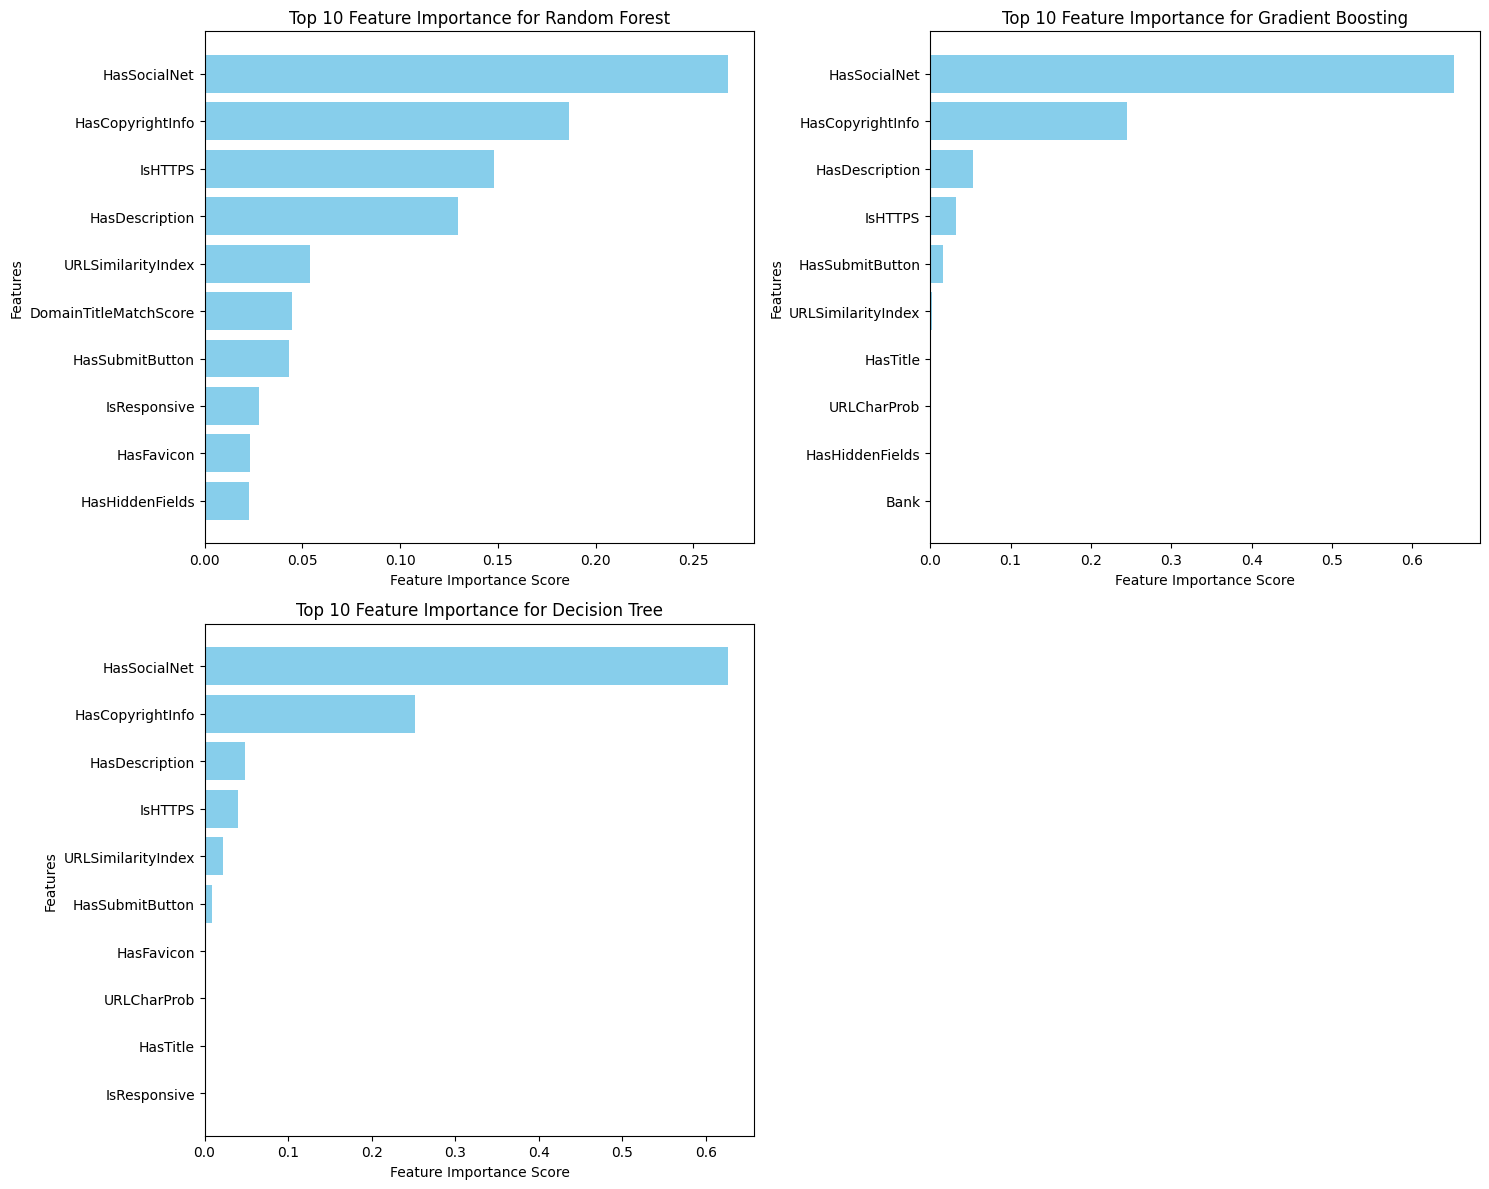

In [ ]:
importances_results = []

# Ki·ªÉm tra Feature Importance cho c√°c m√¥ h√¨nh c√≥ h·ªó tr·ª£
for model_name, model in trained_models.items():
    if hasattr(model, "feature_importances_"):  # Ch·ªâ √°p d·ª•ng cho c√°c m√¥ h√¨nh c√≥ feature_importances_
        feature_importances = model.feature_importances_
        sorted_indices = np.argsort(feature_importances)[::-1]  # S·∫Øp x·∫øp gi·∫£m d·∫ßn

        for i in sorted_indices:
            importances_results.append({
                "Model": model_name,
                "Feature": X.columns[i],
                "Importance": feature_importances[i]
            })

importances_df = pd.DataFrame(importances_results)

from google.colab.data_table import DataTable
DataTable(importances_df)

# V·∫Ω bi·ªÉu ƒë·ªì Feature Importance cho t·∫•t c·∫£ c√°c m√¥ h√¨nh c√≥ h·ªó tr·ª£
plt.figure(figsize=(15, 12))

# Ch·ªçn c√°c m√¥ h√¨nh c√≥ feature importance
top_models = ["Random Forest", "Gradient Boosting", "Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree"]
valid_models = [model for model in top_models if model in importances_df["Model"].unique()]

num_models = len(valid_models)  # S·ªë m√¥ h√¨nh c√≥ Feature Importance h·ª£p l·ªá

for i, model_name in enumerate(valid_models):
    top_importances = importances_df[importances_df["Model"] == model_name].nlargest(10, "Importance")

    plt.subplot((num_models + 1) // 2, 2, i+1)
    plt.barh(top_importances["Feature"], top_importances["Importance"], color="skyblue")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title(f"Top 10 Feature Importance for {model_name}")
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [ ]:
# ƒê∆∞·ªùng d·∫´n th∆∞ m·ª•c l∆∞u tr·ªØ m√¥ h√¨nh tr√™n Google Drive
model_dir = "/content/drive/My Drive/Dataset/fixed_overfitting_models"
# Ki·ªÉm tra xem th∆∞ m·ª•c c√≥ t·ªìn t·∫°i kh√¥ng
if not os.path.exists(model_dir):
    print("Th∆∞ m·ª•c ch∆∞a t·ªìn t·∫°i, h√£y ki·ªÉm tra quy·ªÅn truy c·∫≠p tr√™n Google Drive.")
else:
    print("Th∆∞ m·ª•c ƒë√£ t·ªìn t·∫°i, ti·∫øp t·ª•c l∆∞u m√¥ h√¨nh.")

    # L∆∞u m√¥ h√¨nh v√†o th∆∞ m·ª•c tr√™n Google Drive
    saved_model_paths = {}
    for model_name, model in trained_models.items():
        file_path = os.path.join(model_dir, f"{model_name.replace(' ', '_')}.pkl")
        joblib.dump(model, file_path)
        saved_model_paths[model_name] = file_path

    print(saved_model_paths)

Th∆∞ m·ª•c ƒë√£ t·ªìn t·∫°i, ti·∫øp t·ª•c l∆∞u m√¥ h√¨nh.
{'Random Forest': '/content/drive/My Drive/Dataset/fixed_overfitting_models/Random_Forest.pkl', 'Gradient Boosting': '/content/drive/My Drive/Dataset/fixed_overfitting_models/Gradient_Boosting.pkl', 'Logistic Regression': '/content/drive/My Drive/Dataset/fixed_overfitting_models/Logistic_Regression.pkl', 'Support Vector Machine': '/content/drive/My Drive/Dataset/fixed_overfitting_models/Support_Vector_Machine.pkl', 'K-Nearest Neighbors': '/content/drive/My Drive/Dataset/fixed_overfitting_models/K-Nearest_Neighbors.pkl', 'Decision Tree': '/content/drive/My Drive/Dataset/fixed_overfitting_models/Decision_Tree.pkl'}
